<a href="https://colab.research.google.com/github/ramrajv/Ramraj_Prayag_Kaggle/blob/main/Solution_Ramraj_Prayag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecom Churn Case Study

---
<p align = 'right'>Completed By Ramraj Vasudevan and Prayag Sanjay in April 2022</p>


## Problem Statment

Build a machine learning model that is able to predict churning customers of a telecom company based on the features provided for their usage.

### Goals of Study

**1. To find out which high value customer will churn in near future.**

**2. To identify variable which are strong indicator of churn.**

**3. Recommend strategy to manage the churn of the customers.**


## 3. Approach

From the problem statement, we can see following characterstics: -

1. Business wants to know the driver variables for a specific target, in the churn prediction.
   So there is an expectation of **explainability** from the model.
   

2. Business want to **predict** whether a customer will churn or not/.

Thus this problem falls in realms of **predictive analysis** where we want to interpolate the data. 
Aa a result of above two reasons we will employ following steps: -

1. Exploratory Data Analysis: -
   -  Data Understanding and cleaning
   -  Null value handling
   -  Visualising Data
   -  Develop Business Metrics based on domain understanding.
   

3. Logistic Regresssion with feature selection using RFE.


4. Dimensionality Reduction using PCA.


5. Logistics Regression with PCA, k-band cross validation.


6. Predition using SVM.


7. Prediction using Decision Trees and Random Forest.


8. Prediction using XGBoost.


9. Evaluation of various models and comparison.


10. Conclusion and recommendations for business.


## Exploratory Data Analysis

### Data Understanding

#### Load libraries

In [2]:
# Load libraries
import numpy as np
import pandas as pd

import datetime as dt

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
sns.set(style="ticks")
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,8)

from scipy.stats import norm
from scipy import stats

import sklearn
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load train data

url = 'https://media.githubusercontent.com/media/ramrajv/Ramraj_Prayag_Kaggle/main/train.csv'
train = pd.read_csv(url)

In [4]:
# Load test data

url = 'https://raw.githubusercontent.com/ramrajv/Ramraj_Prayag_Kaggle/main/test%20(1).csv'
test = pd.read_csv(url)

In [5]:
# concat test and train data, so that we can do operation on them jointly
# we will separate them out before traning

df = pd.concat([train, test])

In [6]:
# reset index for future operations

df.reset_index(inplace = True)
df.drop('index', axis = 1, inplace = True)
df.index

RangeIndex(start=0, stop=99999, step=1)

In [7]:
# check the churn_probaibility values , nan because of test dataset

df['churn_probability'].unique()

array([ 0.,  1., nan])

### Check for unique values

In [8]:
# check the shape of combined dataset

df.shape

(99999, 172)

In [9]:
df.head().T

,0,1,2,3,4
id,0,1,2,3,4
circle_id,109,109,109,109,109
loc_og_t2o_mou,0.0,0.0,0.0,0.0,0.0
std_og_t2o_mou,0.0,0.0,0.0,0.0,0.0
loc_ic_t2o_mou,0.0,0.0,0.0,0.0,0.0
last_date_of_month_6,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014
last_date_of_month_7,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014
last_date_of_month_8,8/31/2014,8/31/2014,8/31/2014,8/31/2014,8/31/2014
arpu_6,31.277,0.0,60.806,156.362,240.708
arpu_7,87.009,122.787,103.176,205.26,128.191


In [10]:
# find columns with single unique value

df.columns[df.nunique()==1]

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')

In [11]:
# Drop columns with single unique values

df.drop(df.columns[df.nunique()==1], axis = 1, inplace = True)

In [12]:
# drop rows same values in all columns

df.dropna(axis = 1, inplace = True, how = 'all')

In [13]:
# find columns with 2 unique values in all rows

two_f = df.columns[df.nunique()==2]

In [14]:
# print such columns

two_f

Index(['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6',
       'fb_user_7', 'fb_user_8', 'churn_probability'],
      dtype='object')

In [15]:
# drop churn_probability from this dataframe

two_f = df[two_f].drop('churn_probability', axis = 1).columns

In [16]:
# print the dataframe

two_f

Index(['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6',
       'fb_user_7', 'fb_user_8'],
      dtype='object')

In [17]:
# print columns having to unique values

for col in two_f:
    print(col, df[col].unique())

night_pck_user_6 [nan  0.  1.]
night_pck_user_7 [nan  0.  1.]
night_pck_user_8 [nan  0.  1.]
fb_user_6 [nan  1.  0.]
fb_user_7 [nan  1.  0.]
fb_user_8 [nan  1.  0.]


### Categorical Variables

In [18]:
# categorical varaibles in this case are those having less than 20 qunique values

cat_vars = df.columns[df.nunique()<20]
cat_vars

Index(['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_6',
       'monthly_3g_7', 'monthly_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'churn_probability'],
      dtype='object')

In [19]:
# build a list of categorical variables with out the target variable

cat_vars = df[cat_vars].drop('churn_probability', axis = 1).columns
cat_vars

Index(['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_6',
       'monthly_3g_7', 'monthly_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8'],
      dtype='object')

In [20]:
# Null value treatment of categoricals

for col in cat_vars:
    df[col].fillna(df[col].median(), inplace = True)

In [21]:
# check if any null values exist in categorical variables

df[cat_vars].isna().sum()

night_pck_user_6    0
night_pck_user_7    0
night_pck_user_8    0
monthly_2g_6        0
monthly_2g_7        0
monthly_2g_8        0
monthly_3g_6        0
monthly_3g_7        0
monthly_3g_8        0
fb_user_6           0
fb_user_7           0
fb_user_8           0
dtype: int64

In [22]:
# show few rows data of categorical

df[cat_vars].sample(5)

,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_6,fb_user_7,fb_user_8
69181,0.0,0.0,0.0,0,0,0,0,0,0,1.0,1.0,1.0
40974,1.0,1.0,1.0,1,1,2,2,0,0,1.0,1.0,1.0
74827,0.0,0.0,0.0,0,0,0,0,0,0,1.0,1.0,1.0
44051,0.0,0.0,0.0,0,0,0,0,0,0,1.0,1.0,1.0
82688,0.0,0.0,0.0,0,0,0,0,0,0,1.0,1.0,1.0


In [23]:
# Check for Null Values in dataset

df.columns[df.isna().sum()/df.shape[0]>0]

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6',
       ...
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7',
       'arpu_2g_8', 'churn_probability'],
      dtype='object', length=109)

### Drop null data

#### Drop rows with all null values

In [24]:
df.dropna(how = 'all', inplace = True)

In [25]:
# check the shape of the dataframe

df.shape

(99999, 159)

#### Treat columns with null values in more than 70% of the rows

In [26]:
# Check types of variables

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 0 to 99998
Columns: 159 entries, id to churn_probability
dtypes: float64(127), int64(26), object(6)
memory usage: 122.1+ MB


There are six variables of object type. First we will inspect this

In [27]:
# list object types variables

obj = df.columns[df.dtypes=='O']
df[obj].sample(5)

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
85411,6/12/2014,7/30/2014,8/31/2014,NaN,NaN,8/31/2014
80928,6/27/2014,7/20/2014,8/25/2014,NaN,7/9/2014,NaN
70570,6/13/2014,7/31/2014,8/29/2014,6/7/2014,7/5/2014,8/29/2014
42866,6/27/2014,7/31/2014,8/27/2014,NaN,NaN,NaN
26968,6/21/2014,7/16/2014,8/24/2014,NaN,NaN,NaN


The object variables are datetime type variables. We need to convert these into integer type. We will get the recency of recharges for every month by subtracting max date of each variable from the date values

In [28]:
# Convert date values to float representing days

for ele in obj:
    df[ele] = (pd.to_datetime(df[ele]).max() - pd.to_datetime(df[ele])).dt.days

In [29]:
# Check for null values in object type variables

df[obj].isna().sum()/df.shape[0]*100

date_of_last_rech_6          1.607016
date_of_last_rech_7          1.767018
date_of_last_rech_8          3.622036
date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_8    73.660737
dtype: float64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 0 to 99998
Columns: 159 entries, id to churn_probability
dtypes: float64(133), int64(26)
memory usage: 122.1 MB


In [31]:
# print percentage of null values 

df.isna().sum()/df.shape[0]*100

id                           0.000000
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_og_mou_6                3.937039
roam_og_mou_7                3.859039
roam_og_mou_8                5.378054
loc_og_t2t_mou_6             3.937039
loc_og_t2t_mou_7             3.859039
loc_og_t2t_mou_8             5.378054
loc_og_t2m_mou_6             3.937039
loc_og_t2m_mou_7             3.859039
loc_og_t2m_mou_8             5.378054
loc_og_t2f_mou_6             3.937039
loc_og_t2f_mou_7             3.859039
loc_og_t2f_mou_8             5.378054
loc_og_t2c_mou_6             3.937039
loc_og_t2c_m

In [32]:
# list categorical variables

cat_vars

Index(['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_6',
       'monthly_3g_7', 'monthly_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8'],
      dtype='object')

### Null Value Imputation

In [33]:
#  find the columns where there is 50% difference between median and mode

df_nvi = df.drop(['id','churn_probability'], axis = 1)
df_nvi.drop(cat_vars, axis = 1, inplace = True)
med_cols = df_nvi[df_nvi.columns[abs(df_nvi.mean() - df_nvi.median())/\
                               df_nvi.median()>=0.5]].columns

In [34]:
# separate out the mean column

mean_cols = df_nvi.drop(med_cols, axis = 1).columns

In [35]:
# Impute null values as per mean or median values

from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)
imp_med = SimpleImputer(missing_values = np.nan, strategy = 'median',verbose=0)
imp_mean = imp_mean.fit(df_nvi[mean_cols])
imp_med = imp_med.fit(df_nvi[med_cols])
df_nvi[mean_cols] = imp_mean.transform(df_nvi[mean_cols])
df_nvi[med_cols] = imp_med.transform(df_nvi[med_cols])
df[df_nvi.columns] = df_nvi

In [36]:
# columns left with null values

df.columns[df.isna().sum()>0]

Index(['churn_probability'], dtype='object')

#### Infinite value check

In [37]:
# Check for infinite values

print("Printing the count of infinity values")
  
count = np.isinf(df).values.sum()
print("Train dataset contains " + str(count) + " infinite values")

Printing the count of infinity values
Train dataset contains 0 infinite values


### Visualising Data



In [38]:
# plot the boxplot and histplot

def plot_box_dist(col):
    plt.figure(figsize=(20, 18))

    # plot the boxplot

    n = 1
    for ele in col:
        plt.subplot(2,3,n)
        sns.boxplot(x = 'churn_probability', y = ele, data = df1, palette={0: "g", 1: "r"})
        n+=1
        
    # plot the histogram
    for ele in col:
        plt.subplot(2,3,n)
        sns.histplot(df1[df1['churn_probability'] == 0][ele], color = 'green', kde = True)
        sns.histplot(df1[df1['churn_probability'] == 1][ele], color = 'red', kde=True)
        plt.legend(['Not churn', 'churn'])
        n+=1

#### Average Revenue Per User (ARPU)

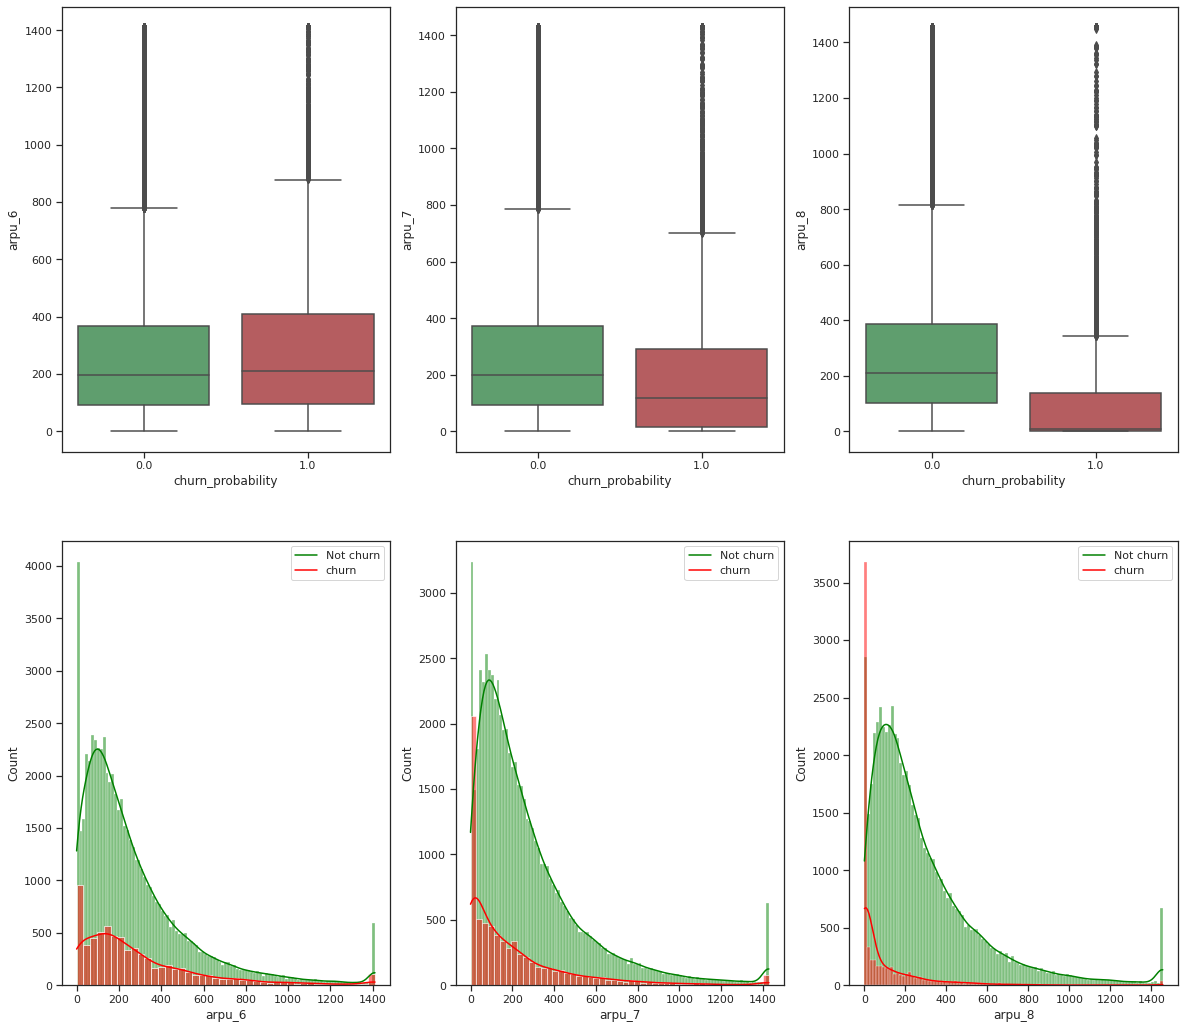

In [39]:
df1 = df.copy()
col = ['arpu_6', 'arpu_7', 'arpu_8']

# Treat Outliers before plotting

for ele in col:
    percentiles = df1[ele].quantile([0.01,0.99]).values
    df1[ele][df1[ele] <= percentiles[0]] = percentiles[0]
    df1[ele][df1[ele] >= percentiles[1]] = percentiles[1]

plot_box_dist(col)

**Observations:**

Average revenue per customer is goes on decreasing for churn customers.

Majority of the data is right skewed.

Outliers can be seen for this feature.

#### Total Minutes of Usage for Incoming call 

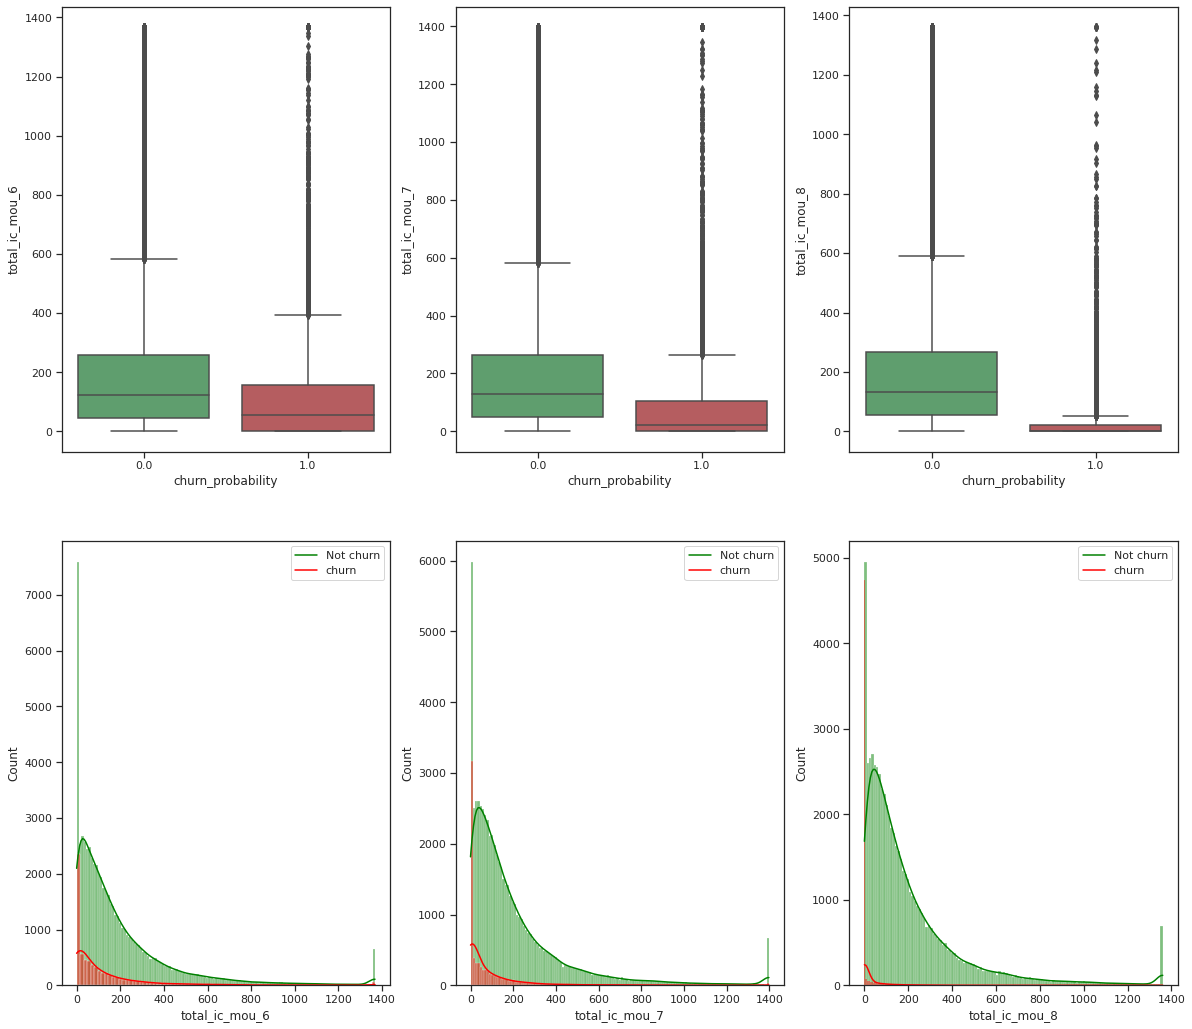

In [40]:
col = ['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']

# Treat Outliers before plotting

for ele in col:
    percentiles = df1[ele].quantile([0.01,0.99]).values
    df1[ele][df1[ele] <= percentiles[0]] = percentiles[0]
    df1[ele][df1[ele] >= percentiles[1]] = percentiles[1]

plot_box_dist(col)

**Observations:**

Minutes of incoming call usage goes on decreasing for churn customers.

Majority of the data is right skewed.

Outliers can be seen for this feature.

#### Total Minutes of Usage for Outgoing call 

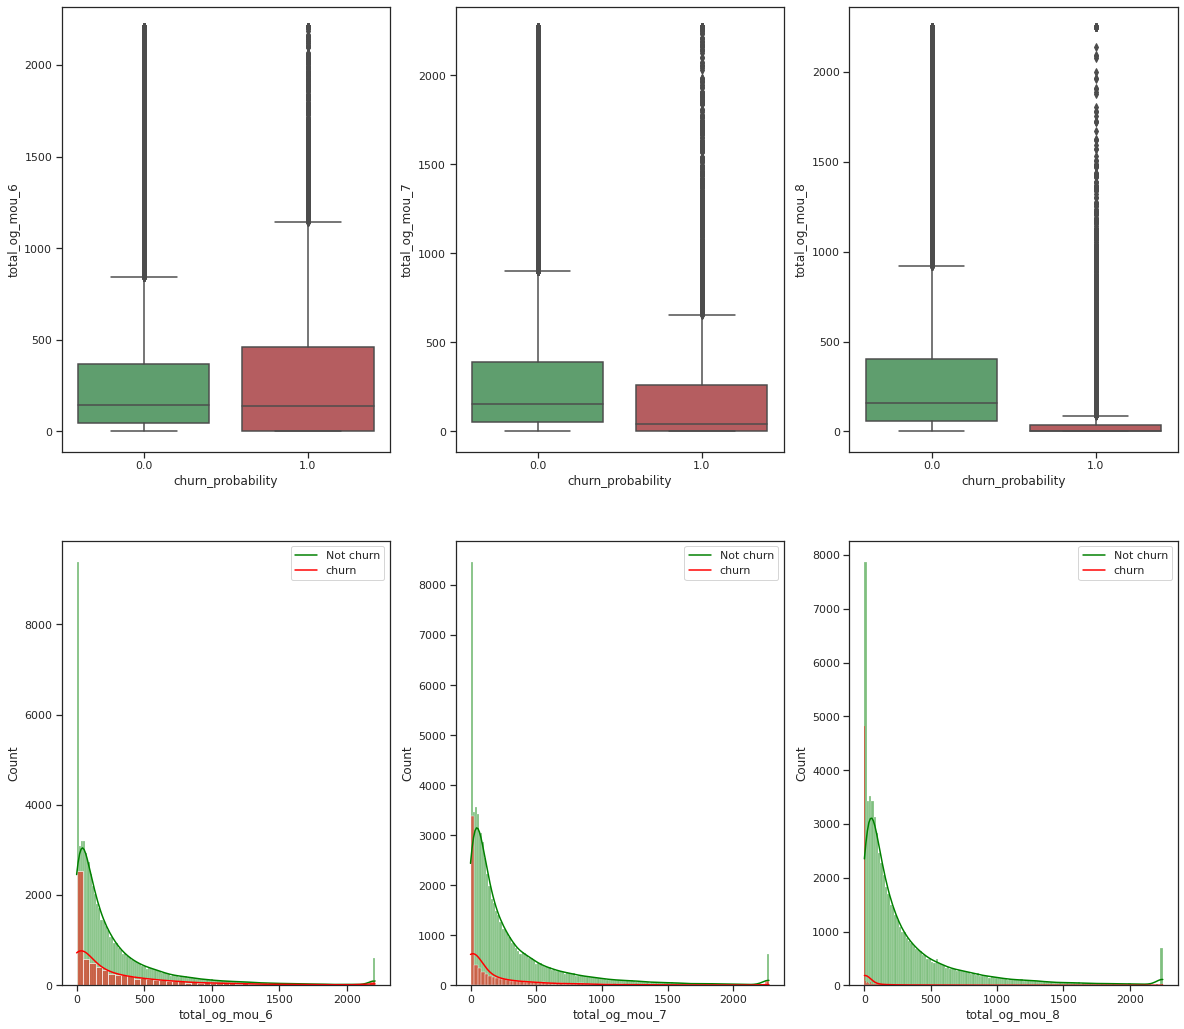

In [41]:
col = ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']

# Treat Outliers before plotting

for ele in col:
    percentiles = df1[ele].quantile([0.01,0.99]).values
    df1[ele][df1[ele] <= percentiles[0]] = percentiles[0]
    df1[ele][df1[ele] >= percentiles[1]] = percentiles[1]

plot_box_dist(col)

**Observations:**

Total minutes of outgoing call usage goes on decreasing for churn customers.

Majority of the data is right skewed.

Outliers can be seen for this feature.

#### Number of total recharges

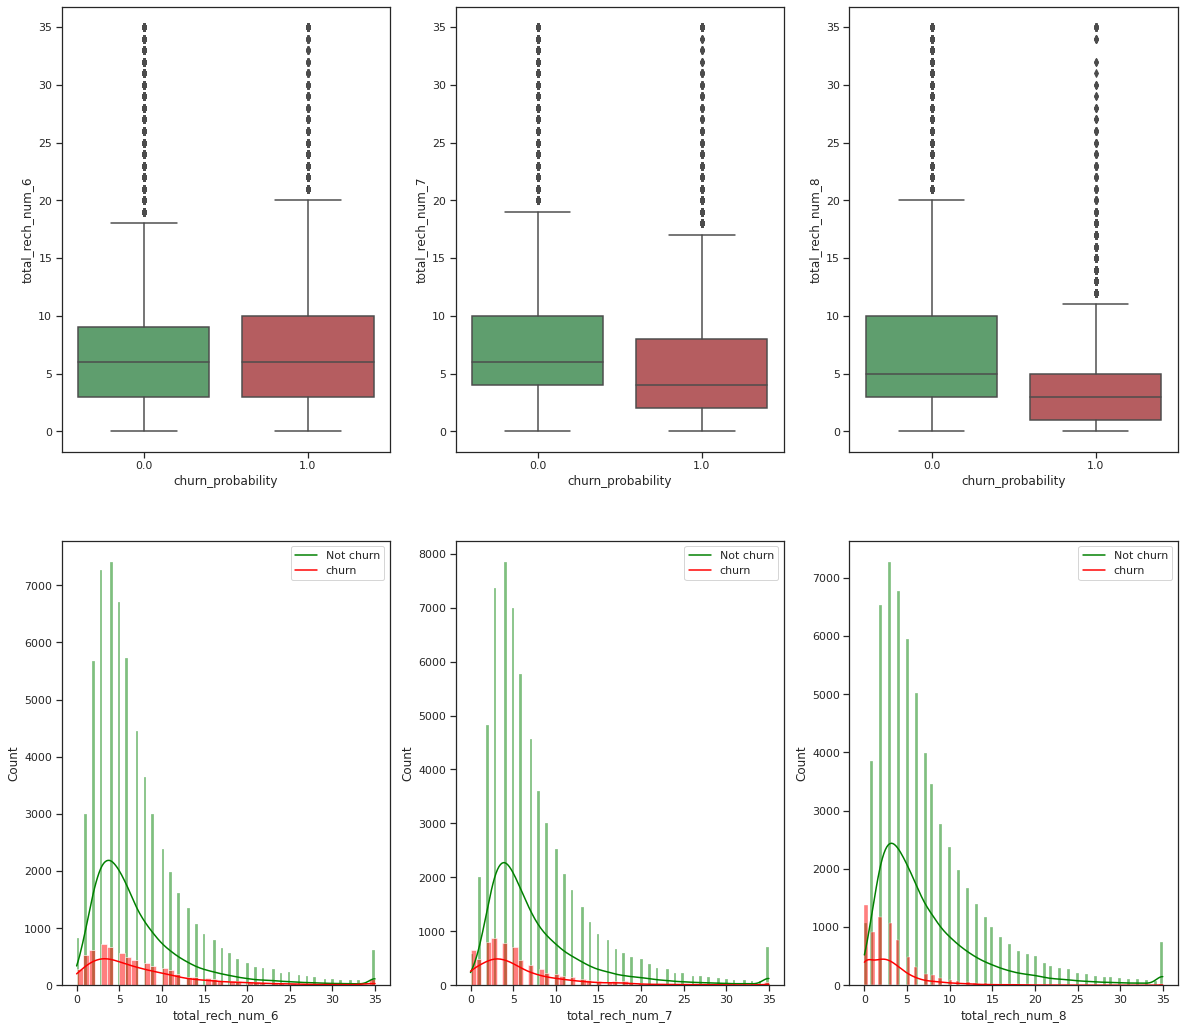

In [42]:
col = ['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8']

# Treat Outliers before plotting

for ele in col:
    percentiles = df1[ele].quantile([0.01,0.99]).values
    df1[ele][df1[ele] <= percentiles[0]] = percentiles[0]
    df1[ele][df1[ele] >= percentiles[1]] = percentiles[1]

plot_box_dist(col)

**Observations:**

Number of total recharges goes on decreasing for churn customers.

Majority of the data is right skewed.


#### Total Recharge Amount

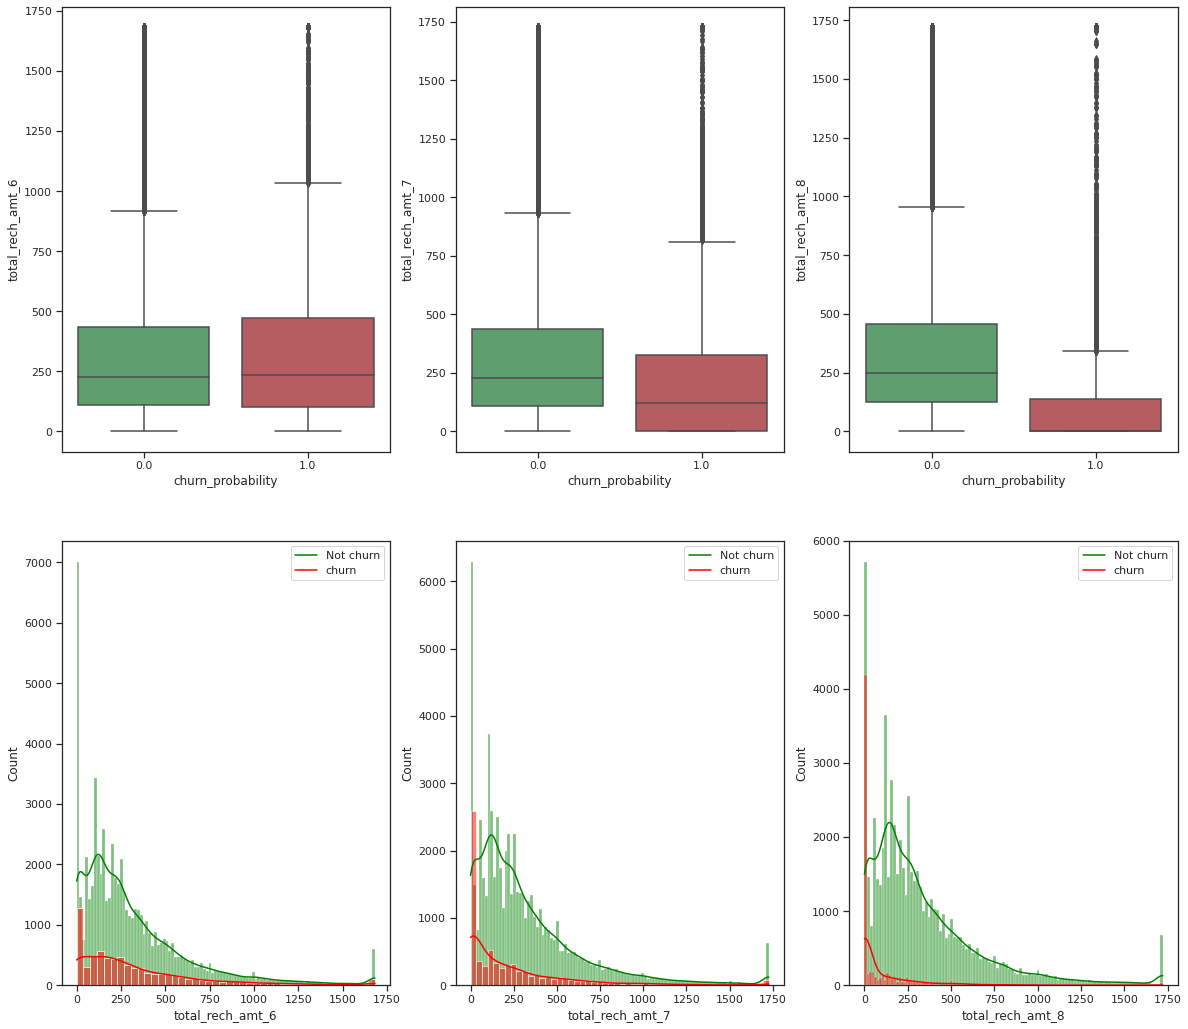

In [43]:
col = ['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8']

# Treat Outliers before plotting

for ele in col:
    percentiles = df1[ele].quantile([0.01,0.99]).values
    df1[ele][df1[ele] <= percentiles[0]] = percentiles[0]
    df1[ele][df1[ele] >= percentiles[1]] = percentiles[1]

plot_box_dist(col)

**Observations:**

Total value of recharges goes on decreasing for churn customers.

Majority of the data is right skewed.

#### Average Age of customer on the network

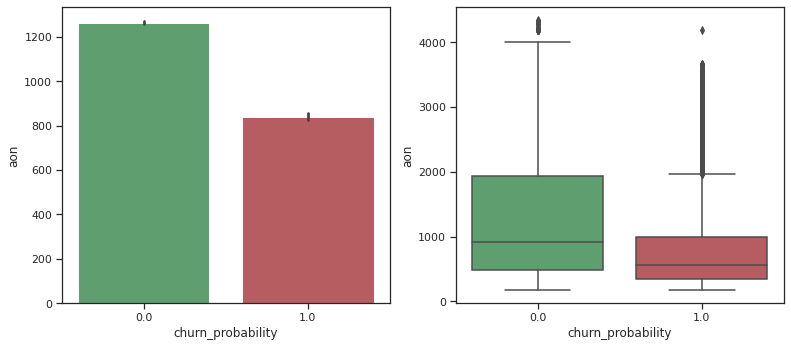

In [44]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.barplot(x = 'churn_probability', y = 'aon', data = df1, palette={0: "g", 1: "r"})
plt.subplot(2,3,2)
sns.boxplot(x = 'churn_probability', y = 'aon', data = df1, palette={0: "g", 1: "r"})
plt.show()

**Observations:**

Average age on the network for churn customers is less than the non-churn customers.


#### Heatmap to show co-relation between recharge amounts features

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8'],
      dtype='object')


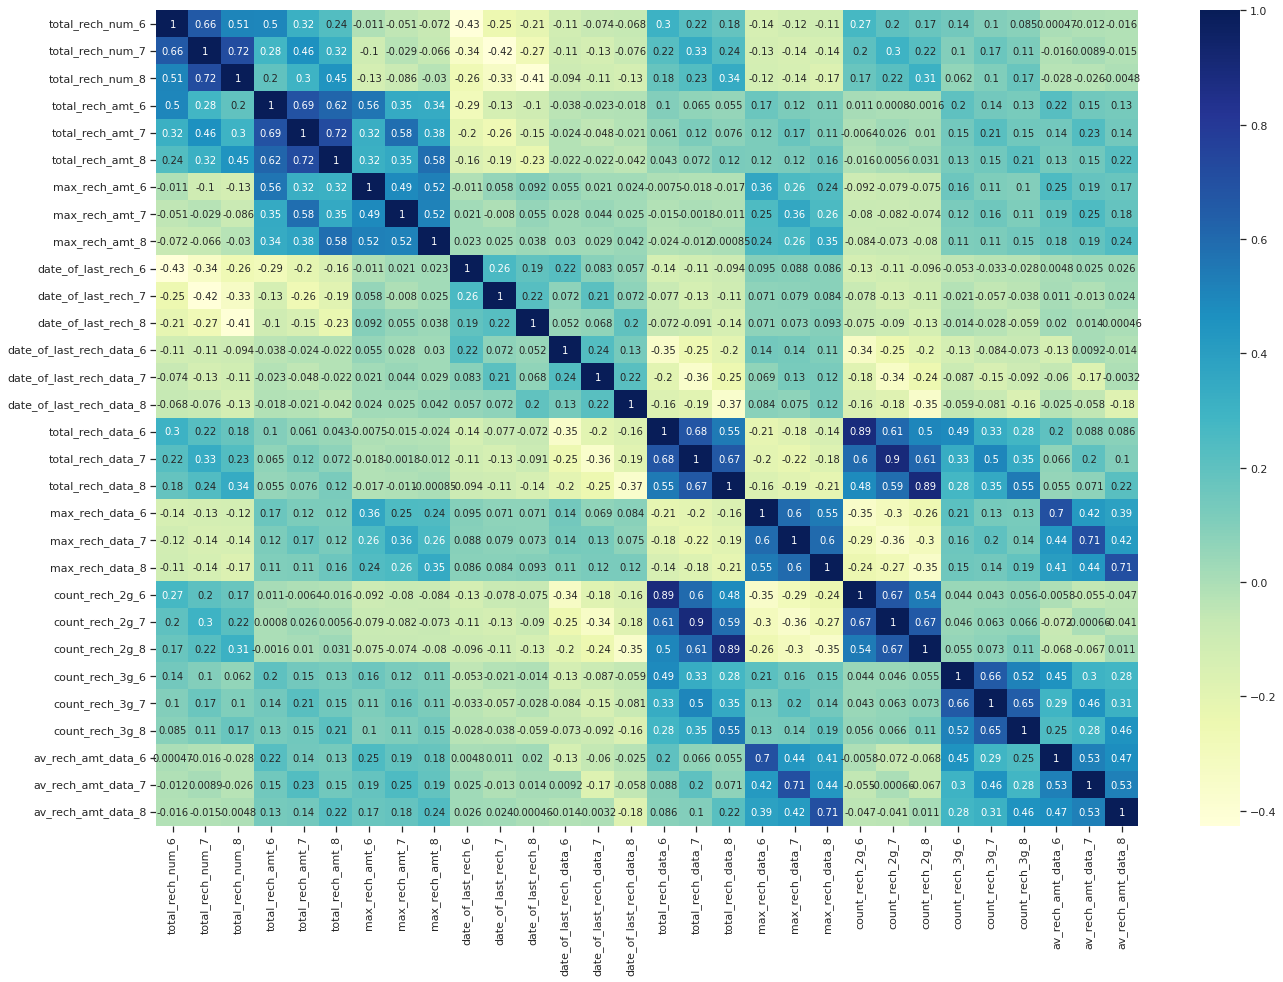

In [45]:
rech_df = df.filter(regex = 'rech')
print(rech_df.columns)
fig = plt.figure(figsize=(22, 15))
sns.heatmap(rech_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

**Observations:**

There is high-correlation between recharge amounts in months and 7 and 8. This indicates the direction that customer will take.
For e.g. for less recharge, he might churn


#### Heatmap to show co-relation between incoming mintues of usage features

Index(['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'loc_ic_mou_6',
       'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7',
       'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
       'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6',
       'isd_ic_mou_7', 'isd_ic_mou_8'],
      dtype='object')


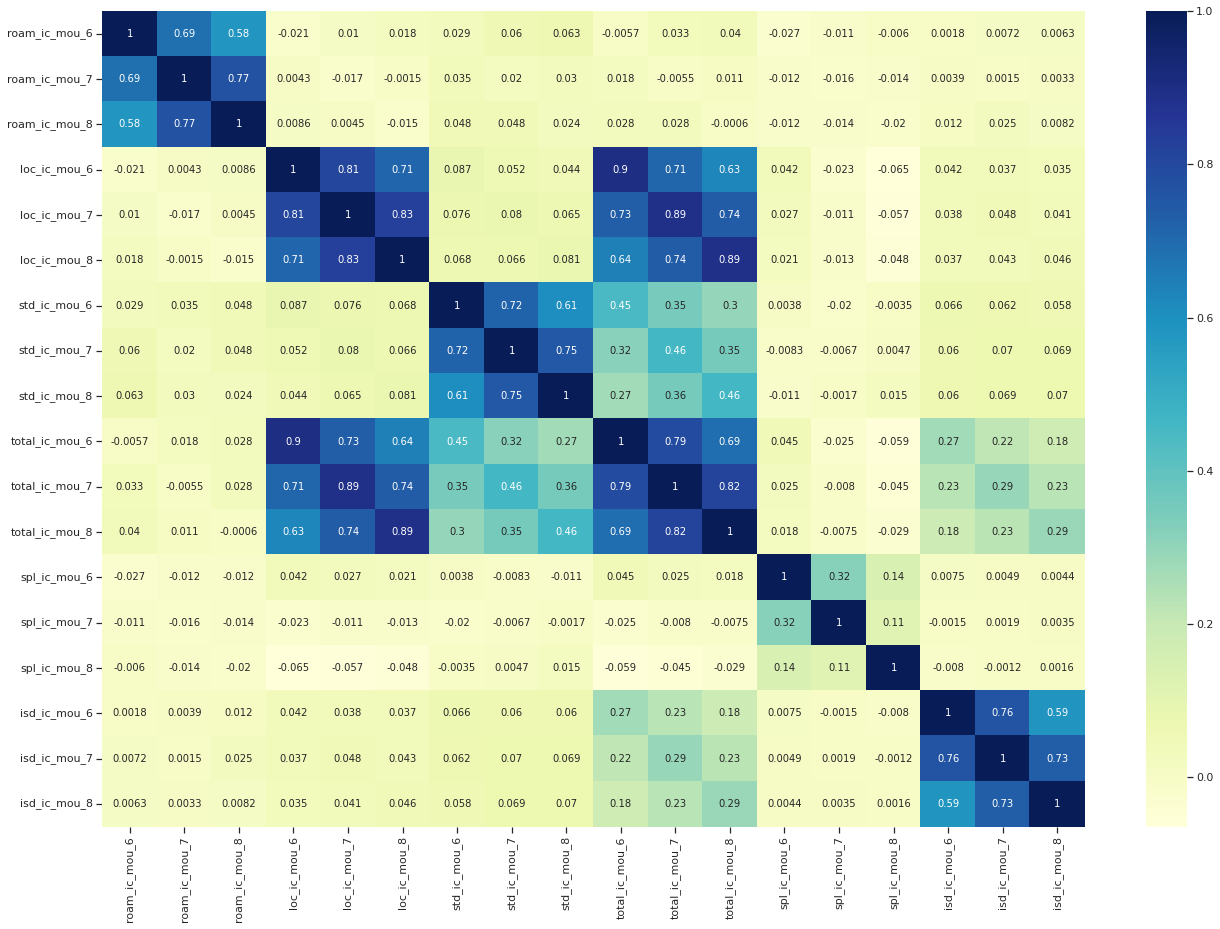

In [46]:
rech_df = df.filter(regex = 'ic_mou')
print(rech_df.columns)
fig = plt.figure(figsize=(22, 15))
sns.heatmap(rech_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

**Observations:**

There is high-correlation  between months usage for isd calls for months 6,7 and 8.

There is high-correlation between total minutes of usage and local call's minutes of usage.


### Grouping and Exploration

In [47]:
df['churn_probability'].unique()

array([ 0.,  1., nan])

In [48]:
df.groupby('churn_probability')[['arpu_6','arpu_7','arpu_8']].median()

,arpu_6,arpu_7,arpu_8
churn_probability,,,
0.0,196.1250,198.916,210.0260
1.0,210.6765,118.348,9.9695


In [49]:
# Check monthly schemes

df.groupby('churn_probability')[cat_vars].agg(pd.Series.mode)

,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_6,fb_user_7,fb_user_8
churn_probability,,,,,,,,,,,,
0.0,0.0,0.0,0.0,0,0,0,0,0,0,1.0,1.0,1.0
1.0,0.0,0.0,0.0,0,0,0,0,0,0,1.0,1.0,1.0


The categorical variables have no bearing on the target variable.

---

#### Data Exploration

In this section we will explore all types of customer activity based on available fields.

We will check the total recharge against ARPU.

In [50]:
df['diff_tot_arpu_6'] = df['total_rech_amt_6'] - df['arpu_6']

In [51]:
df['diff_tot_arpu_7'] = df['total_rech_amt_7'] - df['arpu_7']
df['diff_tot_arpu_8'] = df['total_rech_amt_8'] - df['arpu_8']

In [52]:
diff_vars = ['diff_tot_arpu_6','diff_tot_arpu_7','diff_tot_arpu_8']
df.groupby('churn_probability')[diff_vars].median()

,diff_tot_arpu_6,diff_tot_arpu_7,diff_tot_arpu_8
churn_probability,,,
0.0,28.7280,29.231,31.985
1.0,27.2555,5.576,0.000


Customers with recharge more than ARPU have remained with the network

In [53]:
# Drop difference columns

df.drop(diff_vars, axis = 1, inplace = True)

In [54]:
# Check variance of Age of Network with churn

df.groupby('churn_probability')['aon'].agg('mean')

churn_probability
0.0    1264.003293
1.0     838.399327
Name: aon, dtype: float64

Customers with lower age on network are likely to churn.

---

---

In [55]:
# find counts of each class

df['churn_probability'].value_counts()

0.0    62867
1.0     7132
Name: churn_probability, dtype: int64

In [56]:
# Check the total minutes of usage against churn and non churn cases

df.groupby('churn_probability')[['total_ic_mou_6', 'total_og_mou_6']].agg('mean')

,total_ic_mou_6,total_og_mou_6
churn_probability,,
0.0,206.643635,301.242079
1.0,138.597825,352.370766


In [57]:
# see total incoming/outgoing  calls distribution for 7th month based on churn type

df.groupby('churn_probability')[['total_ic_mou_7', 'total_og_mou_7']].agg('mean')

,total_ic_mou_7,total_og_mou_7
churn_probability,,
0.0,213.892542,318.252422
1.0,95.972761,242.877399


In [58]:
# see total incoming/outgoing  calls distribution for 8th month based on churn type

df.groupby('churn_probability')[['total_ic_mou_8', 'total_og_mou_8']].agg('mean')

,total_ic_mou_8,total_og_mou_8
churn_probability,,
0.0,216.701665,328.550893
1.0,37.919282,92.624937


The churn categories have used lesser minutes. Indicates that the carrier charges higher for lesser period of usage.

In [59]:
# Check for data usage

df.groupby('churn_probability')[['vol_2g_mb_6', 'vol_3g_mb_6']].agg('mean')

,vol_2g_mb_6,vol_3g_mb_6
churn_probability,,
0.0,52.993459,124.938010
1.0,41.023999,97.789079


In [60]:
# see total volume of 2g/3g distribution for 7th month based on churn type

df.groupby('churn_probability')[['vol_2g_mb_7', 'vol_3g_mb_7']].agg('mean')

,vol_2g_mb_7,vol_3g_mb_7
churn_probability,,
0.0,53.696628,135.722042
1.0,29.587367,69.103268


In [61]:
# see total volume of 2g/3g distribution for 8th month based on churn type

df.groupby('churn_probability')[['vol_2g_mb_8', 'vol_3g_mb_8']].agg('mean')

,vol_2g_mb_8,vol_3g_mb_8
churn_probability,,
0.0,54.559777,146.931172
1.0,11.058022,34.604651


In [62]:
# Check for On net and Offnet usage

df.groupby('churn_probability')[['onnet_mou_6', 'offnet_mou_6']].agg('mean')

,onnet_mou_6,offnet_mou_6
churn_probability,,
0.0,124.488166,191.866904
1.0,171.172235,220.841158


In [63]:
# see total arpu value distribution for all months based on churn type

df.groupby('churn_probability')[['arpu_6','arpu_7','arpu_8']].agg('mean')

,arpu_6,arpu_7,arpu_8
churn_probability,,,
0.0,280.280668,284.891073,297.535694
1.0,308.289067,219.081400,114.226380


In [64]:
# see total recharge number distribution for 6th month based on churn type

df.groupby('churn_probability')[['total_rech_num_6', 'total_rech_amt_6']].agg('mean')

,total_rech_num_6,total_rech_amt_6
churn_probability,,
0.0,7.504939,325.570888
1.0,8.109366,350.784072


In [65]:
# see total recharge number distribution for 7th month based on churn type

df.groupby('churn_probability')[['total_rech_num_7', 'total_rech_amt_7']].agg('mean')

,total_rech_num_7,total_rech_amt_7
churn_probability,,
0.0,7.856173,331.234352
1.0,6.388811,244.295149


In [66]:
# see total recharge number distribution for 8th month based on churn type

df.groupby('churn_probability')[['total_rech_num_8', 'total_rech_amt_8']].agg('mean')

,total_rech_num_8,total_rech_amt_8
churn_probability,,
0.0,7.629774,346.878712
1.0,3.656338,120.821228


In [67]:
# Make a variable - average recharge amount

df.loc[df['total_rech_num_6']>0,'avg_rech_amt_6'] = df['total_rech_amt_6']/df['total_rech_num_6']
df.loc[df['total_rech_num_7']>0,'avg_rech_amt_7'] = df['total_rech_amt_7']/df['total_rech_num_7']
df.loc[df['total_rech_num_8']>0,'avg_rech_amt_8'] = df['total_rech_amt_8']/df['total_rech_num_8']

df[['avg_rech_amt_6','avg_rech_amt_7','avg_rech_amt_8']].fillna(0, inplace = True)

In [68]:
# see average recharge distribution for 8th month based on churn type

avgrechamt = ['avg_rech_amt_6','avg_rech_amt_7','avg_rech_amt_8']
df.groupby('churn_probability')[avgrechamt].mean()

,avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8
churn_probability,,,
0.0,47.915508,48.062973,58.530991
1.0,49.131258,38.094136,27.868988


The average rechange amount shows an increasing trend in case of continuining customers and a reducing trend in case of churn customers.

In [69]:
# Drop derived columns

df.drop(avgrechamt, axis = 1, inplace = True)

---

### Metrics for Case Study

#### Metric 1

Trends of ARPU, Total MOU and Total recharges

In [70]:
# Get trend of arpu, total mou and total recharges

# ARPU Trend
df['arpu_trend'] = df['arpu_6'] + df['arpu_8'] - 2*df['arpu_7']

# Total MOU Trend
df['total_mou_trend'] = (df['total_ic_mou_6'] + df['total_og_mou_6']) + \
                        (df['total_ic_mou_8'] + df['total_og_mou_8']) - \
                        2*(df['total_ic_mou_7'] + df['total_og_mou_7'])

# Total Recharge Trend
df['total_rech_trend'] = (df['total_rech_amt_6'] + df['total_rech_amt_8']) - \
                        2*df['total_rech_amt_7']

In [71]:
# tabulate the arpu_trend, total_mou_tring, total_rech_trend from churn and non-churn cases

trend_cols = ['arpu_trend','total_mou_trend','total_rech_trend']
df.groupby('churn_probability')[trend_cols].describe().T

churn_probability                0.0           1.0
arpu_trend       count  62867.000000   7132.000000
                 mean       8.034216    -15.647353
                 std      352.150819    525.597937
                 min   -10932.456000 -10889.744000
                 25%     -111.023000   -201.124000
                 50%       16.760000     38.936500
                 75%      143.406000    202.621250
                 max    10408.476000  11505.508000
total_mou_trend  count  62867.000000   7132.000000
                 mean     -11.151656    -56.187510
                 std      621.672216    840.225102
                 min   -11373.420000  -8355.230000
                 25%     -173.825000   -234.612500
                 50%       13.220000      0.000000
                 75%      190.595000    239.792500
                 max    16016.000000   7078.090000
total_rech_trend count  62867.000000   7132.000000
                 mean       9.980896    -16.984997
                 std      482.814050    653.943450
                 min   -12232.000000 -14782.000000
                 25%     -164.000000   -230.000000
                 50%       20.000000     48.000000
                 75%      207.000000    248.000000
                 max    11748.000000  12000.000000

The recharge trend is positive in case of non churn compared to churn cases where it is negative. The arpu trend and MOU trend also follow suit

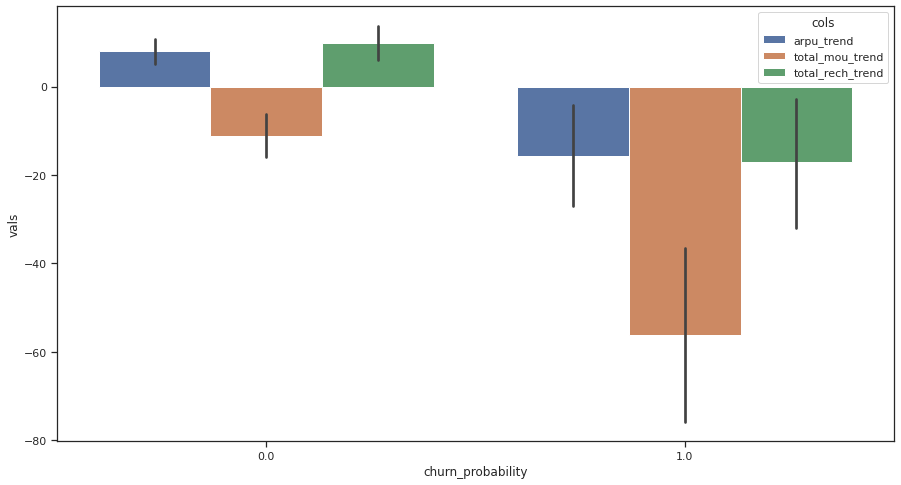

In [72]:
# plot the trends against churn and non-churn cases

trend_cols = ['arpu_trend','total_mou_trend','total_rech_trend']
trend_cols.append('churn_probability')
dft = df[trend_cols]
dfm = dft.melt('churn_probability', var_name='cols', value_name='vals')
sns.barplot(x="churn_probability", y="vals", hue='cols', data=dfm)

The trends of ARPU and Total Recharge columns show a clear distinction between churn and non churn. The Total minutes of use trend shows a higher negative trend for customers who churn.

#### Metric 2

Ratio of number of recharges to age of recharge

In [73]:
# Ratio of number of recharges to age of recharge

df.groupby('churn_probability')[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']].mean()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
churn_probability,,,
0.0,5.764805,5.293641,5.310178
1.0,6.372266,7.268251,7.740999


In [74]:
# find correlation of date of recharge with churn probability

df[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','churn_probability']].corr()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,churn_probability
date_of_last_rech_6,1.000000,0.259213,0.193078,0.030140
date_of_last_rech_7,0.259213,1.000000,0.224576,0.104524
date_of_last_rech_8,0.193078,0.224576,1.000000,0.122562
churn_probability,0.030140,0.104524,0.122562,1.000000


In [75]:
# get statistics for recharges and date of last recharges

cols = ['total_rech_num_6', 'total_rech_num_7','total_rech_num_8',\
        'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']

df_train = df[df['churn_probability'].notna()]
df_train[cols].describe().T

,count,mean,std,min,25%,50%,75%,max
total_rech_num_6,69999.0,7.566522,7.041452,0.0,3.0,6.0,9.0,170.0
total_rech_num_7,69999.0,7.706667,7.050614,0.0,3.0,6.0,10.0,138.0
total_rech_num_8,69999.0,7.224932,7.195597,0.0,3.0,5.0,9.0,138.0
date_of_last_rech_6,69999.0,5.826698,6.096815,0.0,1.0,3.0,9.0,29.0
date_of_last_rech_7,69999.0,5.494829,5.714715,0.0,1.0,4.0,8.0,30.0
date_of_last_rech_8,69999.0,5.557847,5.999668,0.0,1.0,4.0,7.0,30.0


In [76]:
# Get ratio of number of recharges to recharge age

df.loc[df['date_of_last_rech_6']>0,'num_age_ratio_6'] = df['total_rech_num_6']\
                                                    /df['date_of_last_rech_6']

In [77]:
# find ratios which are null

df['num_age_ratio_6'].isna().sum()

16960

In [78]:
# impute ratios which are null with zero values

df['num_age_ratio_6'].fillna(0, inplace = True)

In [79]:
# get the statitics for ratio

df_train = df[df['churn_probability'].notna()]
df_train['num_age_ratio_6'].describe()

count    69999.000000
mean         2.383417
std          4.427788
min          0.000000
25%          0.117647
50%          0.666667
75%          2.500000
max        102.000000
Name: num_age_ratio_6, dtype: float64

In [80]:
# get ratio for 7th and 8th month

df.loc[df['date_of_last_rech_7']>0,'num_age_ratio_7'] = df['total_rech_num_7']\
                                                    /df['date_of_last_rech_7']

df.loc[df['date_of_last_rech_8']>0,'num_age_ratio_8'] = df['total_rech_num_8']\
                                                    /df['date_of_last_rech_8']

df['num_age_ratio_7'].fillna(0, inplace = True)
df['num_age_ratio_8'].fillna(0, inplace = True)

In [81]:
# see the distribution of the age ratio with respect to churn probaility

num_age_ratio = ['num_age_ratio_6', 'num_age_ratio_7','num_age_ratio_8']
df.groupby('churn_probability')[num_age_ratio].median()

,num_age_ratio_6,num_age_ratio_7,num_age_ratio_8
churn_probability,,,
0.0,0.666667,0.714286,0.750000
1.0,0.600000,0.428571,0.333333


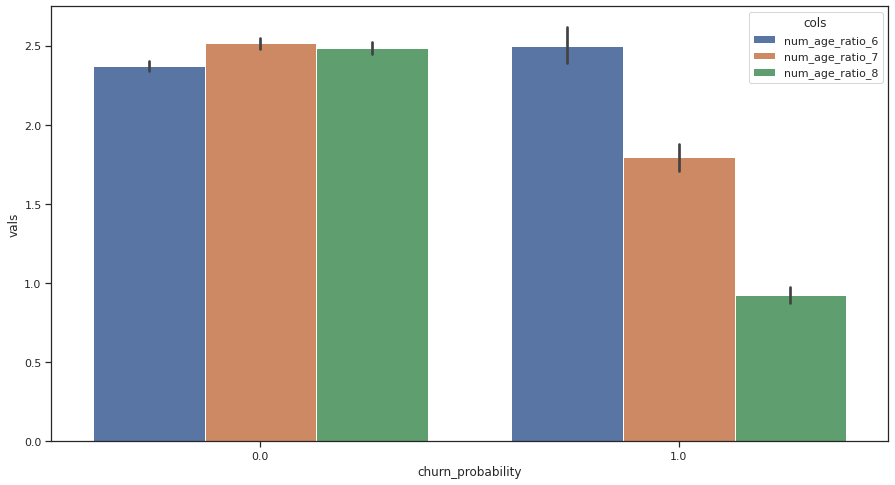

In [82]:
# plot the age ratio for churn and non-churn cases

num_age_ratio = ['num_age_ratio_6', 'num_age_ratio_7','num_age_ratio_8']
num_age_ratio.append('churn_probability')
dft = df[num_age_ratio]
dfm = dft.melt('churn_probability', var_name='cols', value_name='vals')
g = sns.barplot(x="churn_probability", y="vals", hue='cols', data=dfm)

**Observation:**


The ratio of number of recharges to age of recharge for churn cases is lower than non churn cases for months 7 and 8 whereas, it is slightly higher in case of month 6

---

#### Metric 3

Ratio of average recharge to age of recharge

In [83]:
# Get average recharge amount

df.loc[df['total_rech_num_6']>0,'avg_rech_6'] = df['total_rech_amt_6'] / \
                                                df['total_rech_num_6']

df.loc[df['total_rech_num_7']>0,'avg_rech_7'] = df['total_rech_amt_7'] / \
                                                df['total_rech_num_7']

df.loc[df['total_rech_num_8']>0,'avg_rech_8'] = df['total_rech_amt_8'] / \
                                                df['total_rech_num_8'] 

df['avg_rech_6'].fillna(0, inplace = True)
df['avg_rech_7'].fillna(0, inplace = True)
df['avg_rech_8'].fillna(0, inplace = True)

# Get ratio of average recharge to age of recharge

df.loc[df['date_of_last_rech_6']>0,'avg_age_ratio_6'] = df['avg_rech_6']/\
                                                    df['date_of_last_rech_6']

df.loc[df['date_of_last_rech_7']>0,'avg_age_ratio_7'] = df['avg_rech_7']/\
                                                    df['date_of_last_rech_7']

df.loc[df['date_of_last_rech_8']>0,'avg_age_ratio_8'] = df['avg_rech_8']/\
                                                    df['date_of_last_rech_8']  

df['avg_age_ratio_6'].fillna(0, inplace = True)
df['avg_age_ratio_7'].fillna(0, inplace = True)
df['avg_age_ratio_8'].fillna(0, inplace = True)

In [84]:
# see the distribution of the average age ratio with respect to churn probaility

avg_age_ratio = ['avg_age_ratio_6', 'avg_age_ratio_7','avg_age_ratio_8']

df.groupby('churn_probability')[avg_age_ratio].median()

,avg_age_ratio_6,avg_age_ratio_7,avg_age_ratio_8
churn_probability,,,
0.0,5.236364,5.350000,6.833333
1.0,4.166667,1.428571,0.000000


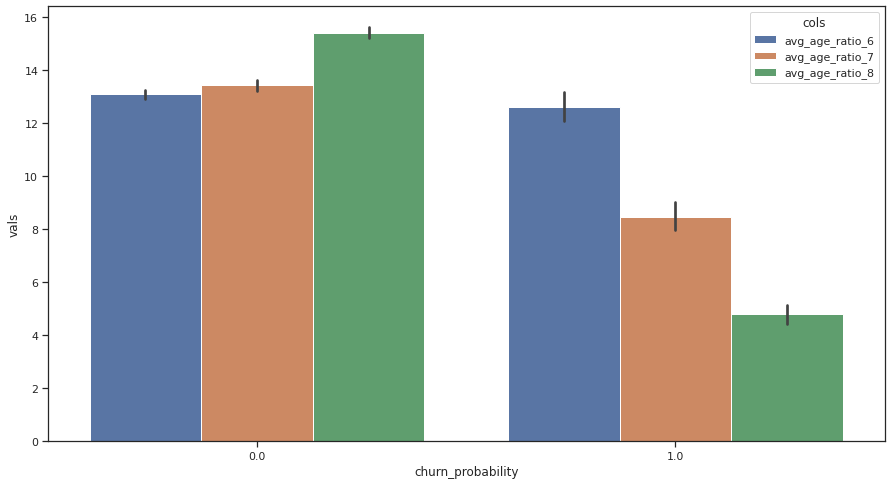

In [85]:
# plot the avergae age ratio for churn and non-churn cases

avg_age_ratio = ['avg_age_ratio_6', 'avg_age_ratio_7','avg_age_ratio_8']
avg_age_ratio.append('churn_probability')
dft = df[avg_age_ratio]
dfm = dft.melt('churn_probability', var_name='cols', value_name='vals')
g = sns.barplot(x="churn_probability", y="vals", hue='cols', data=dfm)

**Observation:**

There is an increasing trend in non churn cases compared to churn cases where the trend is decreasing.

---

In [86]:
# find the correation of features with churn probaility

df_train = df[df['churn_probability'].notna()]
corr_vals = df_train.drop('churn_probability', axis = 1).corrwith(df_train['churn_probability'])
corr_vals.sort_values(ascending = False)

date_of_last_rech_8         0.122562
date_of_last_rech_7         0.104524
std_og_mou_6                0.088721
std_og_t2t_mou_6            0.069426
roam_og_mou_7               0.068077
std_og_t2m_mou_6            0.066676
roam_og_mou_8               0.058426
roam_ic_mou_7               0.053837
roam_og_mou_6               0.051263
roam_ic_mou_8               0.050802
onnet_mou_6                 0.047936
roam_ic_mou_6               0.039684
total_og_mou_6              0.033225
date_of_last_rech_6         0.030140
date_of_last_rech_data_7    0.029548
offnet_mou_6                0.028170
date_of_last_rech_data_8    0.026430
total_rech_num_6            0.025966
arpu_6                      0.025351
fb_user_8                   0.020259
total_rech_amt_6            0.018869
std_og_mou_7                0.012642
std_og_t2t_mou_7            0.011363
std_ic_t2t_mou_6            0.010817
date_of_last_rech_data_6    0.009261
num_age_ratio_6             0.008926
og_others_6                 0.008159
f

**Observation:**

Various features are mildly correlation with churn probability.

## Data Preparation

In [87]:
# make a copy of the dataset

dfc = df.copy()

# do dummy encoding for categorical variables

df = pd.get_dummies(data = df, columns = cat_vars, drop_first = True)

In [88]:
df.shape

(99999, 215)

In [89]:
df.head().T

,0,1,2,3,4
id,0.000000,1.000000,2.000000,3.000000,4.000000
arpu_6,31.277000,0.000000,60.806000,156.362000,240.708000
arpu_7,87.009000,122.787000,103.176000,205.260000,128.191000
arpu_8,7.527000,42.953000,0.000000,111.095000,101.565000
onnet_mou_6,48.580000,0.000000,0.530000,7.260000,21.280000
onnet_mou_7,124.380000,0.000000,15.930000,16.010000,4.830000
onnet_mou_8,1.290000,0.000000,0.000000,0.000000,6.130000
offnet_mou_6,32.240000,0.000000,53.990000,68.760000,56.990000
offnet_mou_7,96.680000,25.990000,82.050000,78.480000,38.110000
offnet_mou_8,2.330000,30.890000,0.000000,50.230000,9.630000


In [90]:
# get our traning dataset without target varaible

df_train = df[df['churn_probability'].notna()]
x = df_train.drop('churn_probability', axis = 1)

In [91]:
x.shape

(69999, 214)

In [92]:
# separate out the test dataset, that is records having churn probability as null

xt = df[df['churn_probability'].isna()].drop('churn_probability', axis = 1)

In [93]:
xt.head().T

,69999,70000,70001,70002,70003
id,69999.000000,70000.000000,70001.000000,70002.000000,70003.000000
arpu_6,91.882000,414.168000,329.844000,43.550000,306.854000
arpu_7,65.330000,515.568000,434.884000,171.390000,406.289000
arpu_8,64.445000,360.868000,746.239000,24.400000,413.329000
onnet_mou_6,31.780000,75.510000,7.540000,5.310000,450.930000
onnet_mou_7,20.230000,41.210000,7.860000,2.160000,609.030000
onnet_mou_8,23.110000,19.840000,8.400000,0.000000,700.680000
offnet_mou_6,60.160000,474.340000,16.980000,40.040000,60.940000
offnet_mou_7,32.160000,621.840000,45.810000,205.010000,23.840000
offnet_mou_8,34.830000,394.940000,45.040000,24.010000,74.160000


In [94]:
xt.shape

(30000, 214)

In [95]:
# get our y dataset 

y = df_train['churn_probability']

### Train Test Split

In [96]:
# Train test splitting
# we use startification as well as churn to nun-churn values are in 1:10 ratio, that is imbalanced

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, \
                                                    test_size=0.3, \
                                                    random_state = 100, \
                                                    stratify=y)

In [97]:
X_train.shape

(48999, 214)

In [98]:
# check if any null values are left behind

x.isna().sum()

id                          0
arpu_6                      0
arpu_7                      0
arpu_8                      0
onnet_mou_6                 0
onnet_mou_7                 0
onnet_mou_8                 0
offnet_mou_6                0
offnet_mou_7                0
offnet_mou_8                0
roam_ic_mou_6               0
roam_ic_mou_7               0
roam_ic_mou_8               0
roam_og_mou_6               0
roam_og_mou_7               0
roam_og_mou_8               0
loc_og_t2t_mou_6            0
loc_og_t2t_mou_7            0
loc_og_t2t_mou_8            0
loc_og_t2m_mou_6            0
loc_og_t2m_mou_7            0
loc_og_t2m_mou_8            0
loc_og_t2f_mou_6            0
loc_og_t2f_mou_7            0
loc_og_t2f_mou_8            0
loc_og_t2c_mou_6            0
loc_og_t2c_mou_7            0
loc_og_t2c_mou_8            0
loc_og_mou_6                0
loc_og_mou_7                0
loc_og_mou_8                0
std_og_t2t_mou_6            0
std_og_t2t_mou_7            0
std_og_t2t

In [99]:
y_train.shape

(48999,)

### Balancing train dataset

The train data set needs to be checked for skewness. As shown earlier, the skew prior split is 2.63

In [100]:
y_train.skew()

2.632368811370128

The skewness of y_train has incresed after split. Let us now balance this skew.

In [101]:
# Get percentage of churn to non churn cases

non_churn = round(y[y==0].count()*100/y.shape[0],0)
churn = round(y[y==1].count()*100/y.shape[0],0)

print('Percentage of churn cases in training set is ',churn)
print('and that for Non churn cases is ', non_churn)

Percentage of churn cases in training set is  10.0
and that for Non churn cases is  90.0


As shown above, our classes are imbalanced and the ratio of non-churn to churn instances is 10:90.

#### Over-sampling using SMOTE
We need to up-sample the churn values using the SMOTE algorithm(Synthetic Minority Oversampling Technique). 

At a high level, SMOTE: Works by creating synthetic samples from the minor class (churn) instead of creating copies.

Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

We are going to implement SMOTE in Python.

In [102]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)

os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=X_train.columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['churn_probability'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of churn cases in oversampled data",len(os_data_y[os_data_y['churn_probability']==1]))
print("Number of non churn",len(os_data_y[os_data_y['churn_probability']==0]))
print("Proportion of churn data in oversampled data is ",len(os_data_y[os_data_y['churn_probability']==1])/len(os_data_X))
print("Proportion of non churn data in oversampled data is ",len(os_data_y[os_data_y['churn_probability']==0])/len(os_data_X))

length of oversampled data is  88014
Number of churn cases in oversampled data 44007
Number of non churn 44007
Proportion of churn data in oversampled data is  0.5
Proportion of non churn data in oversampled data is  0.5


## Recursive Feature Elimination

**RFE done without up-sampling**

In [103]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(estimator = logreg, n_features_to_select = 35)
rfe = rfe.fit(X_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False  True False False False False False
 False False False False False False  True False False  True False False
 False False False False False False  True False False False False False
 False False False  True False  True  True False False  True False False
  True False False  True False False  True False False  True False False
 False False False  True False False  True  True  True  True False False
 False False False False  True  True  True False False False  True  True
  True  True  True  True False False False  True  True  True False False
 False False False False False False False False False False False False
 False False False False  True  True  True False False False False False
 False False False False False False  True  True False False False False
 False False False False False False False False Fa

---

**Running with Up-sampling**

In [104]:
logreg_os = LogisticRegression()
rfe_os = RFE(estimator = logreg, n_features_to_select = 35)
rfe_os = rfe_os.fit(os_data_X, os_data_y.values.ravel())
print(rfe_os.support_)
print(rfe_os.ranking_)

[False False False False False False  True False False  True False False
 False False False  True False False False False False False False False
 False False  True False False False  True False False False False False
 False  True False False False False  True False False  True False  True
  True False False False False False  True False False  True False False
  True False False  True False  True  True False False  True False False
  True False False  True False  True  True False  True  True False False
 False False  True  True False  True False False False  True False False
 False False False False False False  True False False  True  True False
  True False False  True False False False False False  True False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False Fa

---

In [105]:
# get the rfe support column

rfe_cols = []
for i in range(X_train.shape[1]):
    if rfe.support_[i]==True:
        rfe_cols.append(X_train.columns[i])
        print(X_train.columns[i])

loc_og_t2c_mou_7
loc_og_mou_8
std_og_mou_8
isd_og_mou_8
total_og_mou_8
loc_ic_t2f_mou_8
loc_ic_mou_7
loc_ic_mou_8
std_ic_t2t_mou_8
std_ic_t2m_mou_8
std_ic_t2f_mou_8
std_ic_mou_8
total_ic_mou_8
isd_ic_mou_8
ic_others_8
total_rech_num_6
total_rech_num_7
total_rech_num_8
date_of_last_rech_6
date_of_last_rech_7
date_of_last_rech_8
date_of_last_rech_data_6
date_of_last_rech_data_7
date_of_last_rech_data_8
total_rech_data_6
total_rech_data_7
total_rech_data_8
count_rech_2g_6
count_rech_2g_7
count_rech_2g_8
sachet_2g_6
sachet_2g_7
sachet_2g_8
num_age_ratio_7
num_age_ratio_8


In [106]:
# get the rfe support columns for upsamling case

rfe_os_cols = []
for i in range(os_data_X.shape[1]):
    if rfe_os.support_[i]==True:
        rfe_os_cols.append(os_data_X.columns[i])
        print(os_data_X.columns[i])

onnet_mou_8
offnet_mou_8
roam_og_mou_8
loc_og_t2c_mou_7
loc_og_mou_8
std_og_t2f_mou_6
std_og_mou_8
isd_og_mou_8
spl_og_mou_7
spl_og_mou_8
total_og_mou_8
loc_ic_t2t_mou_8
loc_ic_t2m_mou_8
loc_ic_t2f_mou_8
loc_ic_mou_7
loc_ic_mou_8
std_ic_t2t_mou_8
std_ic_t2m_mou_8
std_ic_t2f_mou_8
std_ic_mou_7
std_ic_mou_8
total_ic_mou_7
total_ic_mou_8
isd_ic_mou_7
isd_ic_mou_8
ic_others_7
total_rech_num_8
date_of_last_rech_8
last_day_rch_amt_8
date_of_last_rech_data_6
date_of_last_rech_data_8
total_rech_data_8
count_rech_2g_8
sachet_2g_8
num_age_ratio_8


## Models

We tried various models

### Model 1

In [140]:
X = X_train[rfe_cols]
y = y_train
# y = os_data_y['churn_probability']

In [141]:
# check the p-values for features

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.209963
         Iterations 10
                               Results: Logit
Model:                  Logit                Pseudo R-squared:    0.362     
Dependent Variable:     churn_probability    AIC:                 20645.9389
Date:                   2022-04-11 06:15     BIC:                 20953.9233
No. Observations:       48999                Log-Likelihood:      -10288.   
Df Model:               34                   LL-Null:             -16130.   
Df Residuals:           48964                LLR p-value:         0.0000    
Converged:              1.0000               Scale:               1.0000    
No. Iterations:         10.0000                                             
----------------------------------------------------------------------------
                          Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
----------------------------------------------------------------------------
loc_

**Observation:**

The model has overall low p value.  Need to remove columns with high p-value

---

### Model 2

In [142]:
# Remove column with high p value

cols = list(tuple(rfe_cols))
rem_cols = ['total_rech_data_7', 'ic_others_8','sachet_2g_8']
cols = set(cols) - set(rem_cols)
X = X_train[cols]

# Implement model

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.212579
         Iterations 9
                             Results: Logit
Model:                 Logit               Pseudo R-squared:   0.354     
Dependent Variable:    churn_probability   AIC:                20896.2711
Date:                  2022-04-11 06:15    BIC:                21177.8568
No. Observations:      48999               Log-Likelihood:     -10416.   
Df Model:              31                  LL-Null:            -16130.   
Df Residuals:          48967               LLR p-value:        0.0000    
Converged:             1.0000              Scale:              1.0000    
No. Iterations:        9.0000                                            
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
loc_og_mou_8              0.0126   0.002

Remove columns with high p-value.

---

### Model 3

In [143]:
# Remove column with high p value

# cols.remove('')
rem_cols = ['loc_ic_mou_8', 'num_age_ratio_7', 'isd_ic_mou_8','total_ic_mou_8','count_rech_2g_6']
cols = set(cols) - set(rem_cols)
X = X_train[cols]

# Implement model

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.219695
         Iterations 9
                             Results: Logit
Model:                 Logit               Pseudo R-squared:   0.333     
Dependent Variable:    churn_probability   AIC:                21583.6703
Date:                  2022-04-11 06:16    BIC:                21821.2583
No. Observations:      48999               Log-Likelihood:     -10765.   
Df Model:              26                  LL-Null:            -16130.   
Df Residuals:          48972               LLR p-value:        0.0000    
Converged:             1.0000              Scale:              1.0000    
No. Iterations:        9.0000                                            
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
loc_og_mou_8              0.0101   0.003

The model shows low p-value. The columns can be used for logistics regression.

---

### Logistics Regression Model Fitting

In [144]:
# fit a plain logistic regression model

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, \
                                    test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

#### Predicting results

In [145]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.93


In [146]:
lr_sre = logreg.score(X_test, y_test)

#### Confusion Matrix

In [118]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[13005   176]
 [  876   643]]


@ 111125

<pre>[[13005      176]
 [  875      644]]</pre>

Original

<pre>[[11792   1284]
 [ 2880  10449]]</pre>

#### Compute precision, recall, F-measure and support
To quote from Scikit Learn:
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.
The support is the number of occurrences of each class in y_test.

In [119]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96     13181
         1.0       0.79      0.42      0.55      1519

    accuracy                           0.93     14700
   macro avg       0.86      0.70      0.76     14700
weighted avg       0.92      0.93      0.92     14700



In [120]:
lr_cr = classification_report(y_test, y_pred)
lr_cm = confusion_matrix

### Testing with unseen data

In [121]:
lm = logreg.predict(xt[X.columns])
lm = pd.DataFrame(lm)
lm.reset_index(inplace = True)
lm.rename(columns = {'index':'id',0:'churn_probability'}, inplace = True)
lm['churn_probability'] = lm['churn_probability'].astype(int)
lm['id'] = lm['id'] + 69999
lm.to_csv('Ram_Prayag_lm.csv', index = False)

In [122]:
lm.groupby('churn_probability')['churn_probability'].count()

churn_probability
0    28300
1     1700
Name: churn_probability, dtype: int64

In [123]:
logreg.coef_

array([[ 0.03763455, -0.04293913, -0.03321457, -0.04096045,  0.04552839,
         0.00764639,  0.0278836 , -0.0977782 , -0.05304237, -0.03794975,
        -0.08118645, -0.04561593,  0.0246326 ,  0.04829357, -0.01465995,
        -0.04927535, -0.02930464,  0.04166183, -0.0110405 , -0.01601892,
        -0.05048351, -0.00054089,  0.00882942, -0.02824256,  0.00931522,
        -0.05992407, -0.03485375]])

### Most important features as per Logistic Regression

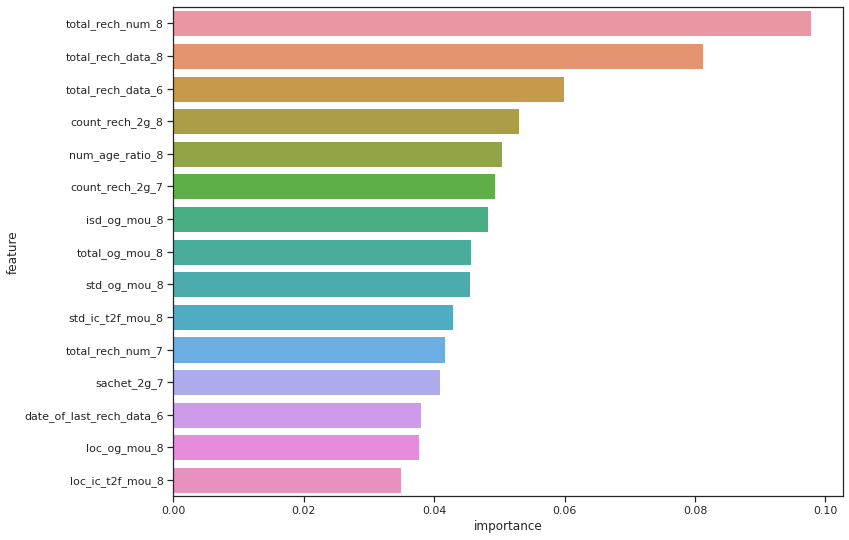

In [124]:
# Most important features

lm_df = pd.DataFrame({'feature' : list(X.columns), 'importance' : abs(logreg.coef_[0])})
lm_df = lm_df.sort_values(by = 'importance', ascending = False).head(15)
fig = plt.figure(figsize = (12, 9))
sns.barplot(data = lm_df, y = 'feature', x = 'importance')
plt.show()

#### Logistics Regression Conclusion

1. The latest month is of importance.
2. The recharges are important features followed by ratio of number to age of recharge.
3. Other features include minutes of use and number of recharges.

## Top features

Based on the Logistic Regression model, the following features are effective

In [125]:
lm_df['feature']

7             total_rech_num_8
10           total_rech_data_8
25           total_rech_data_6
8              count_rech_2g_8
20             num_age_ratio_8
15             count_rech_2g_7
13                isd_og_mou_8
11              total_og_mou_8
4                 std_og_mou_8
1             std_ic_t2f_mou_8
17            total_rech_num_7
3                  sachet_2g_7
9     date_of_last_rech_data_6
0                 loc_og_mou_8
26            loc_ic_t2f_mou_8
Name: feature, dtype: object

## PCA Components

Using up-sampled data for PCA process

In [126]:
x.shape

(69999, 214)

In [148]:
y = df_train['churn_probability']
y.shape

(69999,)

In [128]:
xt.shape

(30000, 214)

In [149]:
# split the data for PCA

X_train, X_test, y_train, y_test = train_test_split(x,y, \
                                                    test_size=0.3, \
                                                    random_state = 100, \
                                                    stratify=y)

In [150]:
# Undertake standard scaling of independent variables.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sc_xtr = scaler.fit_transform(X_train)
sc_xte = scaler.transform(X_test)
sc_xus = scaler.transform(xt)

In [151]:
# find principal components
# we are using a target variance of 95%

from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95, svd_solver = 'full', random_state = 100)
principalComponents = pca.fit_transform(sc_xtr)
principalDf = pd.DataFrame(data = principalComponents)

In [152]:
test_components = pca.transform(sc_xte)
X_test_pca = pd.DataFrame(data = test_components)

## Logistics Regression with PCA

In [153]:
y_test.shape

(21000,)

In [154]:
X_test_pca.shape

(21000, 118)

In [155]:
# build a logistic regression model based features suggested by PCA

from sklearn.linear_model import LogisticRegression
X_train_pca = principalDf.copy()
logistic=LogisticRegression()
logistic.fit(X=X_train_pca,y=y_train)
logistic.predict(X_test_pca)
lr_pca_sre=logistic.score(X_test_pca,y_test)

#  print the score
print(lr_pca_sre)

0.9032380952380953


In [170]:
pred_proba = logistic.predict_proba(X_test_pca)

In [171]:
y_preda = pred_proba[:,1]

In [158]:
# print AUC value

"{:2.2}".format(metrics.roc_auc_score(y_test, y_pred))

'0.88'

In [160]:
y_pred = logistic.predict(X_test_pca)

In [168]:
from sklearn.metrics import confusion_matrix
lr_pca_cm = confusion_matrix(y_test, y_pred)
print(lr_pca_cm)

[[18618   242]
 [ 1790   350]]


In [174]:
# print the classification report

from sklearn.metrics import classification_report
lr_pca_cr = classification_report(y_test, y_pred)

print(lr_pca_cr)

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     18860
         1.0       0.59      0.16      0.26      2140

    accuracy                           0.90     21000
   macro avg       0.75      0.58      0.60     21000
weighted avg       0.88      0.90      0.88     21000



In [175]:
# Transform on unseen data

pcomp_unseen = pca.transform(xt)
princDf_unseen = pd.DataFrame(data = pcomp_unseen)

In [177]:
# predict on unseen data

us_pred = logistic.predict(princDf_unseen)
lr_pca_us = pd.DataFrame(us_pred)

### Create a csv file of prediction for Kaggle submission

In [179]:
lr_pca_us = lr_pca_us.reset_index()
lr_pca_us[0] = lr_pca_us[0].astype(int)
lr_pca_us.rename(columns={'index':'id',0:'churn_probability'}, inplace=True)
lr_pca_us['id'] = lr_pca_us['id'] + 69999
lr_pca_us.to_csv('Ram_Prayag_PCA_LR.csv',index = False)

In [178]:
# print count of predicted classes

lr_pca_us.groupby('churn_probability')['churn_probability'].count()

0
0.0    29581
1.0      419
Name: 0, dtype: int64

## Using k-band with Cross Validation

Use logistics regression cv tool of sklearn on pca components

### With PCA

In [196]:
# using LogisticRegressionCV to find best logistic regression model

from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=5, scoring='accuracy', n_jobs=-1, random_state = 100)
cvComponents = clf.fit(X_train_pca, y_train)

In [197]:
y_pred = clf.predict(X_test_pca)

In [198]:
# get the AUC

from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, clf.predict_proba(X_train_pca)[:, 1])

0.877656228059289

In [199]:
from sklearn.metrics import classification_report, confusion_matrix
lr_kbpca_cr = classification_report(y_test, y_pred)
lr_kbpca_cm = confusion_matrix(y_test, y_pred)

In [200]:
print('Classification Report\n',lr_kbpca_cr,'\n\n Confusion Matrix\n\n',lr_kbpca_cm)

Classification Report
               precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     18860
         1.0       0.59      0.16      0.26      2140

    accuracy                           0.90     21000
   macro avg       0.75      0.58      0.60     21000
weighted avg       0.88      0.90      0.88     21000
 

 Confusion Matrix

 [[18621   239]
 [ 1791   349]]


In [201]:
# predict on unseen data

us_pred = clf.predict(princDf_unseen)
lr_kbpca_us = pd.DataFrame(us_pred)

In [202]:
lr_kbpca_us = lr_kbpca_us.reset_index()
lr_kbpca_us[0] = lr_kbpca_us[0].astype(int)
lr_kbpca_us.rename(columns={'index':'id',0:'churn_probability'}, inplace=True)
lr_kbpca_us['id'] = lr_kbpca_us['id'] + 69999
lr_kbpca_us.to_csv('Ram_Prayag_kbpca_LR.csv',index = False)

In [203]:
# print count of predicted classes

lr_kbpca_us.groupby('churn_probability')['churn_probability'].count()

churn_probability
0    29602
1      398
Name: churn_probability, dtype: int64

## Support Vector Machine

In [224]:
# import libaries for SVM

from sklearn import svm
from sklearn.metrics import confusion_matrix

In [225]:
# do the test train split with stratification to address class imbalance

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, stratify=y)

In [206]:
y_train.shape

(48999,)

In [207]:
X_train.shape

(48999, 214)

In [ ]:
# fit using SVM

svc = svm.SVC()
svc.fit(X_train, y_train)

In [ ]:
# Predict on unseen data

y_pred = svc.predict(X_test)

### Confusion Matrix

In [ ]:
# print the confusion matrix

from sklearn.metrics import confusion_matrix, classification_report

svc_cm = confusion_matrix(y_test, y_pred)
svc_cr = classification_report(y_test, y_pred)

print('Classification Report\n',svc_cr,'\n\nConfusion Matrix\n',svc_cm)

### Predict on test.csv

In [218]:
# find prediction on test dataset, get test dataset from the combined one

xt = df[df['churn_probability'].isna()].drop('churn_probability', axis = 1)

In [219]:
# predict on the test dataset

svm_unseen = svc.predict(xt)

In [220]:
svm_unseen

array([0., 0., 0., ..., 0., 0., 0.])

In [221]:
svm_unseen = pd.DataFrame(svm_unseen)

In [222]:
# get csv file for Kaggle submission

svm_unseen.reset_index(inplace = True)
svm_unseen.rename(columns = {'index':'id',0:'churn_probability'}, inplace = True)
svm_unseen['id'] = svm_unseen['id'] + 69999
svm_unseen['churn_probability'] = svm_unseen['churn_probability'].astype(int)
svm_unseen.to_csv('Ram_Prayag_svm.csv', index=False)

In [223]:
svm_unseen.groupby('churn_probability')['churn_probability'].count()

churn_probability
0    30000
Name: churn_probability, dtype: int64

## Random Forest

In [ ]:
# Importing required packages for visualization

from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [ ]:
# these function will be used for displaying graph

def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X_train.columns, 
                    class_names=['Churn', "No Churn"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [ ]:
# these function will be used for displaying statistics

    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [ ]:
# get libararies for Random forest

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# build a baseline Random forest classfier

rf = RandomForestClassifier(random_state=100, n_estimators=200, max_depth=10, \
                            n_jobs = -1, oob_score=True)

In [ ]:
# fit the date

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, n_jobs=-1,
                       oob_score=True, random_state=100)

In [ ]:
# check one of the estimator

rf.estimators_[0]

DecisionTreeClassifier(max_depth=10, max_features='auto',
                       random_state=186422792)

In [ ]:
# sample_tree = rf.estimators_[4]

In [ ]:
# gph = get_dt_graph(sample_tree)
# Image(gph.create_png(), width=1000, height=700)

In [ ]:
# gph = get_dt_graph(rf.estimators_[2])
# Image(gph.create_png(), width=1000, height=700)

In [ ]:
# print the confusion matrix

evaluate_model(rf)

Train Accuracy : 0.9498765280924101
Train Confusion Matrix:
[[43326   681]
 [ 1775  3217]]
--------------------------------------------------
Test Accuracy : 0.9414285714285714
Test Confusion Matrix:
[[18543   317]
 [  913  1227]]


In [ ]:
# get csv file for the kaggle submission

rf_us = rf.predict(xt)
rf_us = pd.DataFrame(rf_us)
rf_us.reset_index(inplace = True)
rf_us.rename(columns = {'index':'id',0:'churn_probability'}, inplace = True)
rf_us['id'] = rf_us['id'] + 69999
rf_us.to_csv('Ram_Prayag_rf.csv', index = False)

In [ ]:
# get count of the churn and non churn classes

rf_us.groupby('churn_probability')['churn_probability'].count()

churn_probability
0.0    27634
1.0     2366
Name: churn_probability, dtype: int64

In [ ]:
# checking the oob score

rf.oob_score_

0.941835547664238

### Using Grid search for hyper-parameter tuning for Ramdom Forest

In [ ]:
# create the object

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [ ]:
# Create the parameter grid based on the results of random search 

params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100, 200],
    'n_estimators': [10, 30, 50, 100, 200]
}

In [ ]:
# Instantiate the grid search model

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv = 4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
# fit the data

%%time
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 150 candidates, totalling 600 fits
CPU times: user 58.5 s, sys: 2.53 s, total: 1min 1s
Wall time: 51min 33s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
# get the best estimator

rf_best = grid_search.best_estimator_

In [ ]:
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [ ]:
# print the confusion matrix

evaluate_model(rf_best)

Train Accuracy : 0.96132574134166
Train Confusion Matrix:
[[43628   379]
 [ 1516  3476]]
--------------------------------------------------
Test Accuracy : 0.9418095238095238
Test Confusion Matrix:
[[18545   315]
 [  907  1233]]


In [ ]:
# check one of the estimator

sample_tree = rf_best.estimators_[0]

### Use Estimators to train model with max_depth=10, min_samples_leaf=10, n_jobs=-1

In [ ]:

rf = RandomForestClassifier(random_state=100, n_estimators=100, max_depth=10, \
                            min_samples_leaf=10, n_jobs = -1, oob_score=True)

In [ ]:
# fir on the train data

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_jobs=-1,
                       oob_score=True, random_state=100)

In [ ]:
# check one of the estimator

rf.estimators_[0]

DecisionTreeClassifier(max_depth=10, max_features='auto', min_samples_leaf=10,
                       random_state=186422792)

In [ ]:
sample_tree = rf.estimators_[4]

In [ ]:
# print the confusion matrix

evaluate_model(rf)

Train Accuracy : 0.9461009408355272
Train Confusion Matrix:
[[43279   728]
 [ 1913  3079]]
--------------------------------------------------
Test Accuracy : 0.9419047619047619
Test Confusion Matrix:
[[18551   309]
 [  911  1229]]


In [ ]:
# get the Kaggle submission file

rf_us = rf.predict(xt)
rf_us = pd.DataFrame(rf_us)
rf_us.reset_index(inplace = True)
rf_us.rename(columns = {'index':'id',0:'churn_probability'}, inplace = True)
rf_us['churn_probability'] = rf_us['churn_probability'].astype(int)
rf_us['id'] = rf_us['id'] + 69999
rf_us.to_csv('Ram_Prayag_rf_gdcv.csv', index = False

In [ ]:
# find the count of churn classes

rf_us.groupby('churn_probability')['churn_probability'].count()

churn_probability
0    27661
1     2339
Name: churn_probability, dtype: int64

In [ ]:
# checking the oob score

rf.oob_score_

0.9418967734035388

In [ ]:
# predict on the test dataset 

y_pred = rf.predict(X_test)

In [ ]:
# print report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97     18860
         1.0       0.80      0.57      0.67      2140

    accuracy                           0.94     21000
   macro avg       0.88      0.78      0.82     21000
weighted avg       0.94      0.94      0.94     21000



In [ ]:
# Confusion Matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[18551   309]
 [  911  1229]]


Previous CM @ 101100
[[18551   309]

 [  911  1229]]

### Variable importance in RandomForest and Decision trees

In [ ]:
# create a baselinet classfier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)

In [ ]:
# fit on the training data

classifier_rf.fit(X_train, y_train)

In [ ]:
# check the importance array

classifier_rf.feature_importances_

In [ ]:
# sort the importance array

imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": classifier_rf.feature_importances_
})

In [ ]:
imp_df.sort_values(by="Imp", ascending=False)

## XG Boost

---

### XG Boost with over sampling

In [ ]:
# use SMOTE to address class imbalance

os = SMOTE(random_state=0)

os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=X_train.columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['churn_probability'])

In [ ]:
# use K-fold

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search_os = RandomizedSearchCV(xgb, param_distributions=params, 
                                   n_iter=param_comb, 
                                   scoring='accuracy', 
                                   n_jobs=4, 
                                   cv=skf.split(os_data_X, os_data_y), 
                                   verbose=3, 
                                   random_state=1001 )

# Random search fitting

random_search_os.fit(os_data_X, os_data_y)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7f6fec3d8b50>,
                   estimator=XGBClassifier(colsample_bytree=0.8, gamma=1.5,
                                           learning_rate=0.02, max_depth=10,
                                           min_child_weight=10,
                                           n_estimators=200, nthread=1,
                                           silent=True, subsample=0.8),
                   n_iter=5, n_jobs=4,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': [4, 5, 7, 10],
                                        'min_child_weight': [1, 5, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=1001, scoring='accuracy', verbose=3)

In [ ]:
# print various results

print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search_os.cv_results_)
# results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([161.61784943, 279.77522143, 249.97621648, 135.09330996,
       164.8958358 ]), 'std_fit_time': array([ 0.7608971 ,  2.76111691,  1.255278  ,  0.71457467, 25.92082444]), 'mean_score_time': array([0.48093414, 0.84056441, 0.59871165, 0.45938142, 0.39905969]), 'std_score_time': array([0.01077512, 0.01650405, 0.01487161, 0.00838444, 0.1452814 ]), 'param_subsample': masked_array(data=[0.6, 0.8, 0.8, 1.0, 0.6],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[1, 10, 5, 1, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[5, 10, 7, 5, 7],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.5, 1.5, 5, 1, 1.5],
             mask=[False, False, False, False, False],
       fi

In [ ]:
# get the best estimator

random_search_os.best_estimator_

XGBClassifier(colsample_bytree=0.8, gamma=1.5, learning_rate=0.02, max_depth=10,
              min_child_weight=10, n_estimators=200, nthread=1, silent=True,
              subsample=0.8)

In [ ]:
# ??

xgb_os = random_search_os.best_estimator_

In [ ]:
# separate out the test dataset

xt = df[df['churn_probability'].isna()].drop('churn_probability', axis = 1)

In [ ]:
# the accuracy score

xgb_os.score(os_data_X, os_data_y)

0.97187947372009

In [ ]:
# print the parameters for XGboost

xgb_os.get_params

<bound method XGBModel.get_params of XGBClassifier(colsample_bytree=0.8, gamma=1.5, learning_rate=0.02, max_depth=10,
              min_child_weight=10, n_estimators=200, nthread=1, silent=True,
              subsample=0.8)>

In [ ]:
# fit on the data

xgb_os.fit(os_data_X, os_data_y)

XGBClassifier(colsample_bytree=0.8, gamma=1.5, learning_rate=0.02, max_depth=10,
              min_child_weight=10, n_estimators=200, nthread=1, silent=True,
              subsample=0.8)

#### Confusion Matrix

In [ ]:
# print the confusion matrix and stats

y_pred = xgb_os.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)
print()
print('\n Classification Report')
print(classification_report(y_test, y_pred))

Confusion Matrix
[[18076   784]
 [  622  1518]]


 Classification Report
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96     18860
         1.0       0.66      0.71      0.68      2140

    accuracy                           0.93     21000
   macro avg       0.81      0.83      0.82     21000
weighted avg       0.94      0.93      0.93     21000



#### Predict on test.csv

In [ ]:
# get the csv for Kaggle submission

y_us = xgb_os.predict(xt)
results_df = pd.DataFrame(data={'id':xt.id, 'churn_probability':y_us.astype(int)})
results_df.to_csv('Ram_Prayag_XGB_os.csv', index=False)

In [ ]:
# check the shape result dataset

results_df.shape

(30000, 2)

In [ ]:
# check few rows of the result dataset

results_df.head()

,id,churn_probability
69999,69999,0
70000,70000,0
70001,70001,1
70002,70002,0
70003,70003,0


In [ ]:
# check count of various classes

results_df.groupby('churn_probability')['churn_probability'].count()

churn_probability
0    26701
1     3299
Name: churn_probability, dtype: int64

### XG Boost Without Over Sampling


This time we will oversample the data to address the class imbalance

In [ ]:
# import required libaries

from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [ ]:
# A parameter grid for XGBoost

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [4, 5, 7, 10]
        }

In [ ]:
# create a baseline object

xgb = XGBClassifier(learning_rate=0.02, n_estimators=200, objective=
                    'binary:logistic', silent=True, nthread=1)

In [ ]:
# separate out the y vector

y = df_train['churn_probability']

In [ ]:
x.shape

(69999, 214)

In [ ]:
# spit the data in training and validatino test

from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(x,y, test_size=0.3, stratify=y)

In [ ]:
# set parameter from StartifiedKFold and call RandomzedSearchCV

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, 
                                   n_iter=param_comb, 
                                   scoring='roc_auc', 
                                   n_jobs=4, 
                                   cv=skf.split(X_train, y_train), 
                                   verbose=3, 
                                   random_state=1001 )

# Random search fitting
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7f6feb881050>,
                   estimator=XGBClassifier(learning_rate=0.02, n_estimators=200,
                                           nthread=1, silent=True),
                   n_iter=5, n_jobs=4,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': [4, 5, 7, 10],
                                        'min_child_weight': [1, 5, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=1001, scoring='roc_auc', verbose=3)

In [ ]:
# print the various results

print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
# results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([161.61784943, 279.77522143, 249.97621648, 135.09330996,
       164.8958358 ]), 'std_fit_time': array([ 0.7608971 ,  2.76111691,  1.255278  ,  0.71457467, 25.92082444]), 'mean_score_time': array([0.48093414, 0.84056441, 0.59871165, 0.45938142, 0.39905969]), 'std_score_time': array([0.01077512, 0.01650405, 0.01487161, 0.00838444, 0.1452814 ]), 'param_subsample': masked_array(data=[0.6, 0.8, 0.8, 1.0, 0.6],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[1, 10, 5, 1, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[5, 10, 7, 5, 7],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.5, 1.5, 5, 1, 1.5],
             mask=[False, False, False, False, False],
       fi

In [ ]:
# show the best estinator

random_search.best_estimator_

XGBClassifier(colsample_bytree=0.8, gamma=1.5, learning_rate=0.02, max_depth=10,
              min_child_weight=10, n_estimators=200, nthread=1, silent=True,
              subsample=0.8)

In [ ]:
# create an object of the best estimator

xgb = random_search.best_estimator_

In [ ]:
# separate out the test dataset

xt = df[df['churn_probability'].isna()].drop('churn_probability', axis = 1)

In [ ]:
# show the accuracy

xgb.score(x,y)

0.9539279132559036

In [ ]:
# show the parameters

xgb.get_params

<bound method XGBModel.get_params of XGBClassifier(colsample_bytree=0.8, gamma=1.5, learning_rate=0.02, max_depth=10,
              min_child_weight=10, n_estimators=200, nthread=1, silent=True,
              subsample=0.8)>

In [ ]:
# fit on the data ??

xgb.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.8, gamma=1.5, learning_rate=0.02, max_depth=10,
              min_child_weight=10, n_estimators=200, nthread=1, silent=True,
              subsample=0.8)

#### Confusion Matrix

In [ ]:
# print confusion matrix and other statistics

y_pred = xgb.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[18413   447]
 [  782  1358]]
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     18860
         1.0       0.75      0.63      0.69      2140

    accuracy                           0.94     21000
   macro avg       0.86      0.81      0.83     21000
weighted avg       0.94      0.94      0.94     21000



#### Predict on test.csv

In [ ]:
y_us = xgb.predict(xt)
results_df = pd.DataFrame(data={'id':xt.id, 'churn_probability':y_us.astype(int)})
results_df.to_csv('Submission.csv', index=False)

In [ ]:
# confirm the shape of the prediction

results_df.shape

(30000, 2)

In [ ]:
# check few rows from prediction

results_df.head()

,id,churn_probability
69999,69999,0
70000,70000,0
70001,70001,1
70002,70002,0
70003,70003,0


In [ ]:
# show the count of the classes

results_df.groupby('churn_probability')['churn_probability'].count()

churn_probability
0    27451
1     2549
Name: churn_probability, dtype: int64

## Feature Importance - XG Boost without Over Sampling

This approach gave the best accuracy score for us on the Kaggle platform


In [ ]:
# get the feature importance from XGBoost run

f_imp = xgb.feature_importances_
xgbFImp = pd.DataFrame()
xgbFImp['features'] = x.columns
xgbFImp['importance'] = f_imp
xgbFImp.sort_values(by = 'importance', inplace = True, ascending = False)
xgbFImp.head(20)

,features,importance
81,total_ic_mou_8,0.194493
54,total_og_mou_8,0.078264
126,vol_2g_mb_8,0.035209
15,roam_og_mou_8,0.031530
3,arpu_8,0.016917
129,vol_3g_mb_8,0.015510
66,loc_ic_mou_8,0.014740
105,last_day_rch_amt_8,0.014414
6,onnet_mou_8,0.011685
84,spl_ic_mou_8,0.011561


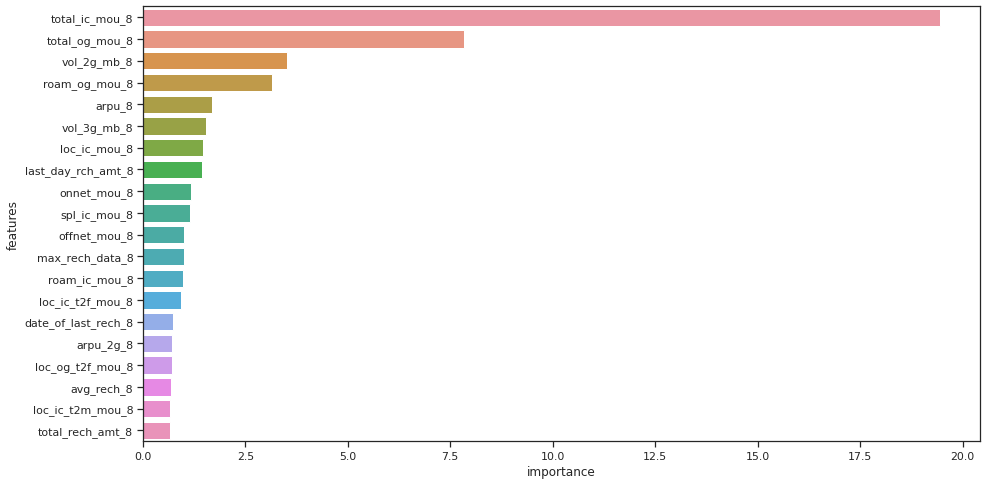

In [ ]:
# show the compartive importance from the XGBoost created feature importance

xgbFImp['importance'] = xgbFImp['importance'] * 100
plt.figure(figsize = (15,8))
sns.barplot(data = xgbFImp.head(20), y = 'features', x = 'importance')
plt.show()

## Case Study Observations

1. The most important feature is **total_ic_mou_8**.

2. The features that have a relatively higher score are: -

>a. total_og_mou_8 - Total outgoing minutes for month 8.

>b. vol_2g_mb_8 - Data usage in the 2g spectrum for month 8.

>c. roam_og_mou_8 - Roaming outgoing minutes of usage for month 8.

3. Other features to be considered include average revenue, 3g data volume, local incoming minutes of use and last day for recharge amount.

## Recommendations

1. In view of the above observations, this team recommends that customers using higher levels of total incoming minutes be encouraged to continue in the network. 

2. The other business recommendations include: -

>a. Customers with high total outgoing minutes of use, 2g data volume and with roaming outgoing users be retained within network.

>b. Network should try to optimise on average revenue, increase 3g data volume, encourage local calls and provide sops to higher recharge amount.